#### Exercise 01 : Damped harmonic oscillator

ODE problems are important in computational physics, so we will look at one more example: the damped harmonic oscillation. This problem is well described on the wiki page: http://en.wikipedia.org/wiki/Damping

The equation of motion for the damped oscillator is:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

where $x$ is the position of the oscillator, $\omega_0$ is the frequency, and $\zeta$ is the damping ratio. To write this second-order ODE on standard form we introduce $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

In the implementation of this example we will add extra arguments to the RHS function for the ODE so that we can pass in the damping parameters, rather than using global variables as we did in the previous example. As a consequence of the extra arguments to the RHS, we need to pass an keyword argument `args` to the `odeint` function. Please solve above problem for undamped $\omega_0$=0.0 , under-damped $\omega_0$ < 1.0, critically damped $\omega_0$ =1.0, and over damped $\omega_0$ > 1.0 situations   using python.

In [4]:
import matplotlib.pyplot as plt

from scipy.integrate import odeint, ode

In [5]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [6]:
# initial state: 
y0 = [1.0, 0.0]

In [7]:
# time coodinate to solve the ODE for
import numpy as np
t = np.linspace(0, 10, 1000)
w0 = 2*np.pi*1.0

In [8]:
# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

In [12]:
y1

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.98022777e-01, -3.94918857e-01],
       [ 9.92098928e-01, -7.88276053e-01],
       ...,
       [ 9.92099078e-01,  7.88279963e-01],
       [ 9.98022967e-01,  3.94922714e-01],
       [ 1.00000023e+00,  3.76505125e-06]])

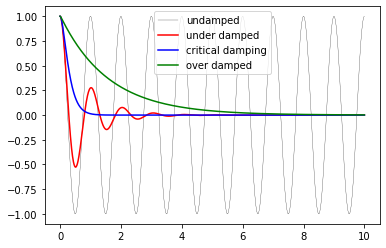

In [9]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();